# Examen

Integrantes:
- Diego Canales Morales
- Roi Jared Flores Graza Stone
- Mónica Ibarra Herrera
- Oscar Josué Rocha Hernández

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

## Parte 1

### Modelo Simple

In [ ]:
path = "datos_gente.csv"
df_first = pd.read_csv(path)

,height,width,shoe_size
0,185,55,28.0
1,173,44,26.5
2,163,44,24.0
3,162,44,24.5
4,172,46,27.0
5,159,40,23.0
6,187,58,27.0
7,165,40,24.0
8,175,49,27.5
9,162,44,23.0


In [3]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(df_first.drop("height", axis=1), df_first["height"], test_size=0.2, random_state=99)

In [4]:
lr_first = LinearRegression()
lr_first.fit(x_test_f, y_test_f)
pred_first = lr_first.predict(x_test_f)
print(f"R2: {r2_score(y_test_f, pred_first)} RMSE: {root_mean_squared_error(y_test_f, pred_first)}")

R2: 0.8941176470588236 RMSE: 2.1213203435596424


**¿Por qué seleccionaste ese modelo?**

Al tener pocos datos decidimos hacer una regresión simple ya que es un modelo fácil de interpretar y de aplicar. Modelos más complejos pueden sobreajustar los datos sobretodo con la poca cantidad de datos que hay.

**¿Utilizaste alguna regularización?**

No, se hizo una regresión lineal simple, sin regularización.

## Parte 2

### Modelo Iteso

In [5]:
path = "datos_gente_1.csv"

df_comb = pd.read_csv(path)

array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object)

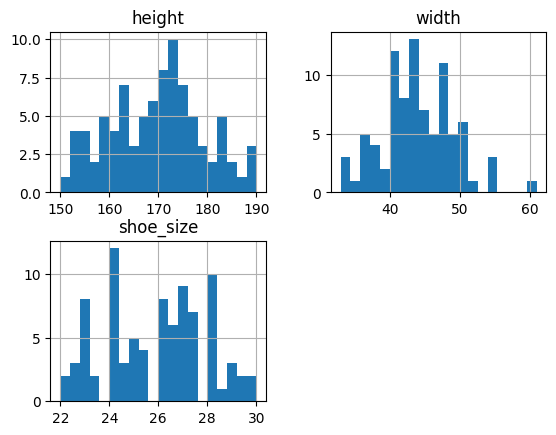

In [6]:
df_comb.hist(bins=20)

In [7]:
X = df_comb[["width", "shoe_size"]]
y = df_comb["height"]

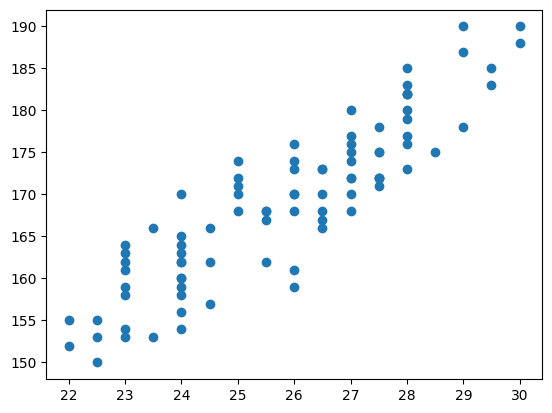

In [8]:
plt.scatter(df_comb["shoe_size"], df_comb["height"])

In [9]:
q25 = np.quantile(y, 0.25)
q75 = np.quantile(y, 0.75)

df_left = df_comb[df_comb["height"] <= q25]
df_right = df_comb[df_comb["height"] >= q75]
df_center = df_comb[(df_comb["height"] >= q25) & (df_comb["height"] <= q75)] 

In [34]:
def sintetizar_datos(df_a_combinar, df_new):
    X_left = df_new[["width", "shoe_size"]]
    y_left = df_new["height"]

    w_m = np.mean(df_new["width"])
    s_m = np.mean(df_new["shoe_size"])
    h_m = np.mean(df_new["height"])

    w_s = np.std(df_new["width"])
    s_s = np.std(df_new["shoe_size"])
    h_s = np.std(df_new["height"])

    new_data_w = np.random.normal(loc=w_m, scale=w_s, size=100)
    new_data_s = np.random.normal(loc=s_m, scale=s_s, size=100)
    new_data_h = np.random.normal(loc=h_m, scale=h_s, size=100)

    new_sorted_w = sorted(new_data_w)
    new_sorted_s = sorted(new_data_s)
    new_sorted_h = sorted(new_data_h)

    df_new_1 = pd.DataFrame({
        "width": new_sorted_w,
        "shoe_size": new_sorted_s,
        "height": new_sorted_h
    })

    df_new_1 = df_new_1.apply(lambda x: round(x, 0))

    df_a_combinar = pd.concat([df_a_combinar, df_new_1])
    return df_a_combinar

In [11]:
data_left = sintetizar_datos(df_comb, df_left)
data_right = sintetizar_datos(df_comb, df_right)

(array([[<Axes: title={'center': 'height'}>,
         <Axes: title={'center': 'width'}>],
        [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object),
 array([[<Axes: title={'center': 'height'}>,
         <Axes: title={'center': 'width'}>],
        [<Axes: title={'center': 'shoe_size'}>, <Axes: >]], dtype=object))

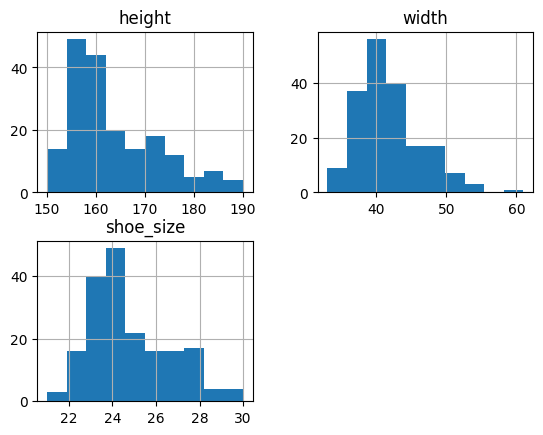

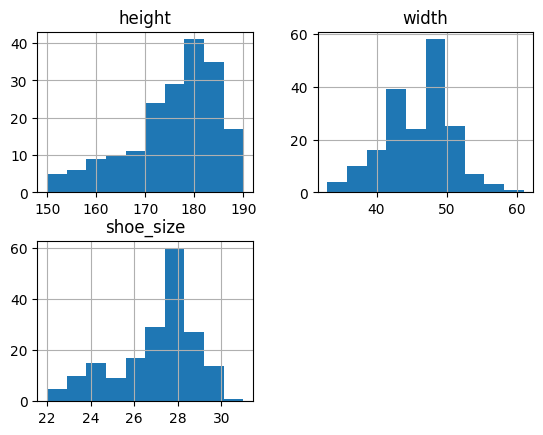

In [12]:
data_left.hist(), data_right.hist()

In [13]:
x_train_left, x_test_left, y_train_left, y_test_left = train_test_split(data_left.drop("height", axis=1), data_left["height"], test_size= 0.2, random_state=55)
x_train_right, x_test_right, y_train_right, y_test_right = train_test_split(data_right.drop("height", axis=1), data_right["height"], test_size= 0.2, random_state=55)
x_train_center, x_test_center, y_train_center, y_test_center = train_test_split(df_comb.drop("height", axis=1), df_comb["height"], test_size= 0.2, random_state=55)

In [14]:
ss_left = StandardScaler()
ss_right = StandardScaler()
ss_center = StandardScaler()


X_train_s_left = ss_left.fit_transform(x_train_left)
X_test_s_left = ss_left.transform(x_test_left)

X_train_s_right = ss_right.fit_transform(x_train_right)
X_test_s_right = ss_right.transform(x_test_right)

X_train_s_center = ss_center.fit_transform(x_train_center)
X_test_s_center = ss_center.transform(x_test_center)

### Right model

Aqui se crea el modelo que predice de manera más adecuada los valores de la derecha

In [15]:
rg_r = Ridge(alpha = 1.26)
rg_r.fit(X_train_s_right, y_train_right)
r_pred_right = rg_r.predict(X_test_s_right)
print(f"R2: {r2_score(y_test_right, r_pred_right)} RMSE: {root_mean_squared_error(y_test_right, r_pred_right)}")

R2: 0.8596172860197685 RMSE: 3.145545051181291


In [16]:
values_para_right = ss_right.transform([[36,22.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
rg_r.predict(values_para_right)

array([155.1041786])

## Left model

Modelo que predice mejor los valores del lado izquierdo

In [18]:
rg_l = Ridge(alpha = 1.26)
rg_l.fit(X_train_s_left, y_train_left)
r_pred_left = rg_l.predict(X_test_s_left)
print(f"R2: {r2_score(y_test_left, r_pred_left)} RMSE: {root_mean_squared_error(y_test_left, r_pred_left)}")

R2: 0.7877487645634527 RMSE: 3.540504189452737


In [19]:
values_para_left = ss_left.transform([[36,22.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
rg_l.predict(values_para_left)

array([153.16199071])

### Center model

In [21]:
rg_c = Ridge(alpha = 1.26)
rg_c.fit(X_train_s_center, y_train_center)
r_pred_center = rg_c.predict(X_test_s_center)
print(f"R2: {r2_score(y_test_center, r_pred_center)} RMSE: {root_mean_squared_error(y_test_center, r_pred_center)}")

R2: 0.8484303924224865 RMSE: 4.280983988385949


In [22]:
values_para_center = ss_center.transform([[36,22.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
rg_c.predict(values_para_center)

array([155.08588937])

**¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?**

Sí, al tener tan pocos datos, en específico 18 necesitamos más datos ya que las predicciones que se hagan con el modelo no van a ser tan confiables, ya que son más sensibles a datos atípicos.

**¿Cómo conseguirías dicha información?**

Medimos a 70 personas más y como se muestra anteriormente se segmentaron los datos de la altura, se hicieron nuevos datos para los datos cuya altura fueran menor o igual al primer cuartil, para los que fueran mayor o igual al tercer cuartil y para los que estuvieran entre el primer y tercer cuartil, en específico se hicieron 100 para cada uno.

**¿Modificarías algún parámetro de tu modelo?**

En este caso, al segmentar los datos por alturas, se hicieron 3 modelos. A los 3 modelos se le aplicó regularización Ridge con un alpha de 1.26, el cual se obtuvo mediante diferentes pruebas e intentos para obtener el valor óptimo.

## Parte 3

### Países Bajos

In [41]:
df = pd.read_csv('datos_gente_1.csv')

In [42]:
df2 = df[df['height'] > 176.5]
df2

,height,width,shoe_size
0,185,55,28.0
6,187,48,29.0
12,179,55,28.0
22,177,42,27.0
25,180,45,27.0
33,178,49,27.5
41,190,50,29.0
44,180,50,28.0
47,178,45,29.0
51,182,47,28.0


In [43]:
df2.mean()

height       182.555556
width         48.222222
shoe_size     28.416667
dtype: float64

In [44]:
df2.std()

height       4.217920
width        4.180565
shoe_size    0.927520
dtype: float64

In [58]:
df2_nuevo_altura = np.random.normal(loc=182.56, scale=4.22, size=100)
df_altura_red= np.round(df2_nuevo_altura, 0)
df_altura = np.sort(df_altura_red)
df_altura

array([170., 173., 176., 177., 177., 177., 177., 177., 177., 178., 178.,
       178., 178., 179., 179., 179., 179., 179., 179., 179., 179., 179.,
       179., 180., 180., 180., 180., 180., 180., 180., 180., 180., 181.,
       181., 181., 181., 181., 181., 181., 182., 182., 182., 182., 182.,
       182., 182., 182., 182., 182., 182., 182., 183., 183., 183., 183.,
       183., 183., 183., 184., 184., 184., 184., 184., 184., 184., 184.,
       184., 184., 185., 185., 185., 185., 185., 185., 186., 186., 186.,
       187., 187., 187., 187., 188., 188., 188., 188., 189., 189., 189.,
       189., 189., 191., 191., 191., 192., 192., 192., 193., 194., 195.,
       197.])

In [59]:
df2_nuevo_ancho = np.random.normal(loc=48.22, scale=4.18, size=100)
df_ancho_red= np.round(df2_nuevo_ancho, 0)
df_ancho = np.sort(df_ancho_red)
df_ancho

array([36., 39., 39., 40., 41., 41., 42., 42., 42., 42., 42., 43., 44.,
       44., 44., 44., 44., 44., 45., 45., 45., 45., 45., 46., 46., 46.,
       46., 46., 46., 46., 46., 47., 47., 47., 47., 47., 47., 47., 48.,
       48., 48., 48., 48., 48., 48., 48., 48., 49., 49., 49., 49., 49.,
       49., 49., 49., 49., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51., 51.,
       52., 52., 52., 52., 52., 52., 52., 53., 53., 53., 53., 54., 54.,
       54., 54., 55., 55., 56., 56., 56., 56., 59.])

In [60]:
df2_nuevo_pie = np.random.normal(loc=28.42, scale=0.93, size=100)
df_pie_red= np.round(df2_nuevo_pie, 1)
df_pie= np.sort(df_pie_red)
df_pie

array([26.6, 26.7, 26.7, 27. , 27. , 27. , 27.1, 27.1, 27.2, 27.2, 27.4,
       27.4, 27.4, 27.4, 27.5, 27.5, 27.6, 27.6, 27.6, 27.7, 27.7, 27.7,
       27.8, 27.8, 27.8, 27.8, 27.9, 27.9, 28. , 28. , 28. , 28. , 28. ,
       28. , 28. , 28.1, 28.1, 28.2, 28.2, 28.2, 28.2, 28.2, 28.2, 28.3,
       28.3, 28.3, 28.3, 28.3, 28.4, 28.4, 28.4, 28.5, 28.5, 28.5, 28.5,
       28.6, 28.6, 28.6, 28.6, 28.6, 28.6, 28.7, 28.7, 28.7, 28.7, 28.7,
       28.8, 28.8, 28.9, 28.9, 28.9, 28.9, 29. , 29. , 29. , 29. , 29. ,
       29.1, 29.1, 29.1, 29.1, 29.2, 29.2, 29.2, 29.3, 29.3, 29.3, 29.4,
       29.4, 29.5, 29.6, 29.7, 29.7, 29.7, 29.8, 29.9, 29.9, 30.3, 30.4,
       30.8])

In [61]:
df_pb = pd.DataFrame({'height': df_altura, 'width': df_ancho, 'shoe_size': df_pie})
df_pb

,height,width,shoe_size
0,170.0,36.0,26.6
1,173.0,39.0,26.7
2,176.0,39.0,26.7
3,177.0,40.0,27.0
4,177.0,41.0,27.0
...,...,...,...
95,192.0,56.0,29.9
96,193.0,56.0,29.9
97,194.0,56.0,30.3
98,195.0,56.0,30.4


<Axes: >

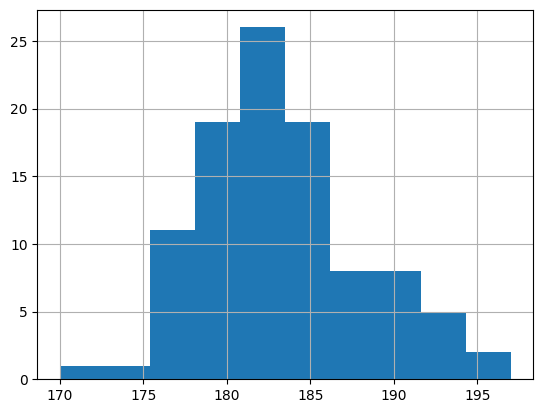

In [62]:
df_pb["height"].hist()

In [63]:
X = df_pb.drop("height", axis=1)
y = df_pb["height"]

In [64]:
x_train_pb, x_test_pb, y_train_pb, y_test_pb = train_test_split(X, y, test_size=0.20, random_state=48)

In [65]:
ss_pb = StandardScaler()
x_train_pb_ss = ss_pb.fit_transform(x_train_pb)
x_test_pb_ss = ss_pb.transform(x_test_pb)

In [68]:
modelo_pb = LinearRegression()
modelo_pb.fit(x_train_pb_ss, y_train_pb)
pb_pred = modelo_pb.predict(x_test_pb_ss)
r2 = r2_score(y_test_pb, pb_pred)
print(f"R2:{r2_score(y_test_pb, pb_pred)}, RMSE: {root_mean_squared_error(y_test_pb, pb_pred)}")

R2:0.9586164125087705, RMSE: 0.9275027358309693


In [70]:
values_pb= ss_pb.transform([[44,27.5]])

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
modelo_pb.predict(values_pb)

array([177.95324607])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

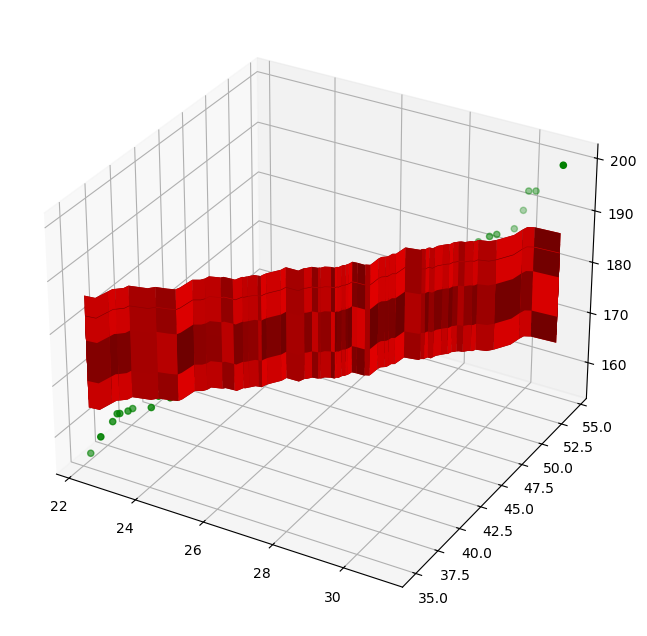

In [ ]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df_pb["width"], df_pb["shoe_size"], df_pb["height"] ,color="green")
ax.plot_surface(df_pb["width"], df_pb["shoe_size"], pb_pred.reshape((-1,1)), color="red")
plt.show()

**¿Agregarías datos a tu base de datos para mejorar las predicciones del modelo?**

Sí, ya que la altura promedio de un mexicano no es la misma que la altura de una persona de Países Bajos.

**¿Cómo conseguirías dicha información?**

Al tener que el promedio de altura de un hombre de Países Bajos es de 183 cm y la altura promedio de una mujer de Países Bajos es de 170 cm, promediamos las alturas y nos basamos en los datos originales y en los que recabamos de las 70 personas que medimos para crear nuevos datos.

**¿Modificarías algún parámetro de tu modelo?**

En este caso, al no tener ningún dato de personas de países bajos y después de hacer gridsearch para obtener el modelo con las mejores métricas, llegamos a la conclusión de que una regresión lineal simple era el mejor modelo, por lo que no aplicamos ninguna regularización.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.scatter_3d(df_pb, x=df_pb["width"], y=df_pb["shoe_size"], z=df_pb["height"])
fig = go.Figure(data=[go.Surface()])
# fig.show()


In [ ]:
class segunda_seccion():
    
    def __init__(self, df):
        self.df = df
        
    def holanda_regressor(self):
        self.pb_pred = r_pb.predict(self.df)
    
    def iteso_regressor(self):
        self.new_pred = rg.predict(self.df)
        print(self.new_pred)
        
    def combined_regressor(self):
        pass
        
    def plotter(self, df, x1, x2, y):
        fig = plt.figure(figsize=((10,8)))    
        ax = fig.add_subplot(projection="3d")
        
        ax.scatter(df[x1], df[x2], df[y])
        ax.plot_surface(df[x1], df[x2], self.new_pred)
        
    
    
    
    # return fig
    
# segunda_seccion(df_center)